In [1]:
import numpy as np
import matplotlib.pyplot as plt

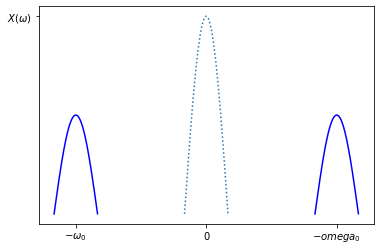

In [22]:
# coswt频谱搬移作用
x = np.arange(-np.pi/2,np.pi/2,0.01)
y = np.cos(x)

plt.plot(x,y,':')
# y1 = np.cos(x-np.pi)/2
plt.plot(x-3*np.pi,y/2,color='b')
plt.plot(x+3*np.pi,y/2,color='b')
plt.xticks([-3*np.pi,0,3*np.pi],['$-\omega_0$','0','$-omega_0$'])
plt.yticks([1],['$X(\omega)$'])
plt.show()

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


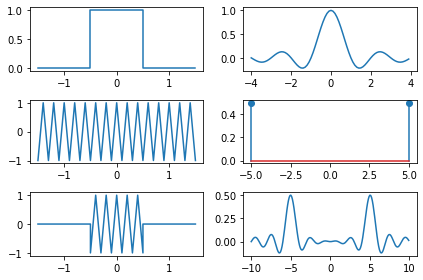

In [70]:
# 矩形脉冲
# x = np.arange(-1.5,1.5,0.1)
# y = [0 for x in x if x <= -0.5]
# y.extend([1 for x in x  if x>-0.5 and x<=0.5])
# y.extend([0 for x in x  if x>0.5])
# plt.plot(x,y)
plt.subplot(3,2,1)
x = [-1.5,-0.5,0.5,1.5]
y = [0,1,0,0]
plt.plot(x,y,drawstyle='steps-post')

# cos(2\pi*5t),5Hz
plt.subplot(3,2,3)
x = np.arange(-1.5,1.6,0.1)
y = np.cos(2*np.pi*5*x)
plt.plot(x,y)

# time zone modulation
plt.subplot(3,2,5)
y = [0 for x in x if x <= -0.4]
y.extend([ np.cos(2*np.pi*5*x) for x in x  if x>=-0.5 and x<=0.6])
y.extend([0 for x in x  if x>=0.5])
x = np.sort(np.append(x,[0.5,-0.5]))
plt.plot(x,y)
plt.plot()

# 矩形脉冲 Spectrum
plt.subplot(3,2,2)
f = np.arange(-4,4,0.1)
y = np.sinc(f)
plt.plot(f,y)

# cos wave spectrum
plt.subplot(3,2,4)
f = [-5,5]
y = [0.5,0.5]
plt.stem(f,y)

# modulation Spectrum
plt.subplot(3,2,6)
f = np.arange(-10,10,0.1)
X = 0.5*np.sinc(f-5)+0.5*np.sinc(f+5)
plt.plot(f,X)

plt.tight_layout()
plt.show()

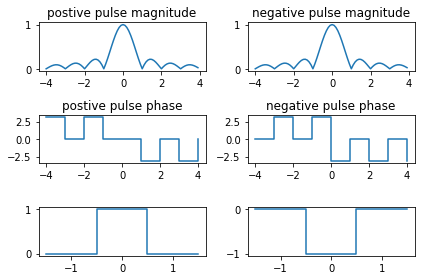

In [100]:
# 正脉冲与负脉冲的幅度谱和相位谱
f = np.arange(-4,4,0.1)
plt.subplot(3,2,1)
X = abs(np.sinc(f))
plt.plot(f,X)
plt.title('postive pulse magnitude')

plt.subplot(3,2,3)
f = np.arange(-4,5,1)
P = [np.pi,0,np.pi,0,0,-np.pi,0,-np.pi,0]
plt.plot(f,P,drawstyle='steps-post')
plt.title('postive pulse phase')

f = np.arange(-4,4,0.1)
plt.subplot(3,2,2)
X = abs(-np.sinc(f))
plt.plot(f,X)
plt.title('negative pulse magnitude')

plt.subplot(3,2,4)
f = np.arange(-4,5,1)
P = [0,np.pi,0,np.pi,-np.pi,0,-np.pi,0,-np.pi]
plt.plot(f,P,drawstyle='steps-post')
plt.title('negative pulse phase')

plt.subplot(3,2,5)
x = np.arange(-1.5,2,0.5)
y=[0,0,0,1,1,0,0]
plt.plot(x,y,drawstyle='steps-pre')

plt.subplot(3,2,6)
y=[-1*t for t in y]
plt.plot(x,y,drawstyle='steps-pre')
plt.tight_layout()
plt.show()

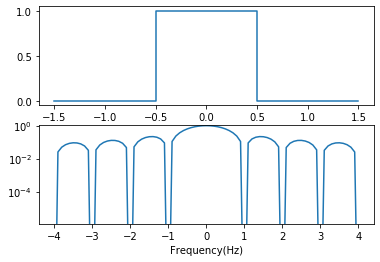

In [124]:
plt.subplot(2,1,1)
x = np.arange(-1.5,2,0.5)
y=[0,0,0,1,1,0,0]
plt.plot(x,y,drawstyle='steps-pre')

plt.subplot(2,1,2)
f=np.arange(-4,4.1,0.1)
X=abs(np.sinc(f))
plt.semilogy(f,X)
# plt.set_yscale('log')
plt.ylim([1.1*10**-6,1.1])
# plt.yticks([1.1,1.1*10**-2,1.1*10**-4,1.1*10**-6],['0','-20','-40','-60'])
# plt.ylabel('Aplitude(dB)')
plt.xlabel('Frequency(Hz)')
plt.show()

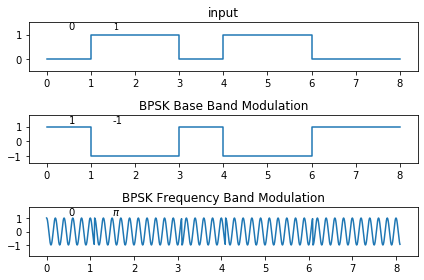

In [153]:
# BPSK调制频谱
# input signal
plt.subplot(3,1,1)
t = np.arange(0,9,1)
d = [0,1,1,0,1,1,0,0,0]
plt.plot(t,d,drawstyle='steps-post')
plt.ylim([-0.5,1.5])
plt.annotate('0',xy=(0.5,1.2))
plt.text(1.5,1.2,'1',fontdict={'size':'8'})
# plt.annotate(['1','0'],xy=[(2.5,1.2),(3.5,1.2)]) #无法同时进行标注
plt.title('input')

# 基带调制信号(映射+基带调制)
plt.subplot(3,1,2)
t = np.arange(0,9,1)
d = [1,-1,-1,1,-1,-1,1,1,1]
plt.plot(t,d,drawstyle='steps-post')
plt.ylim([-1.5,1.8])
plt.annotate('1',xy=(0.5,1.2))
plt.annotate('-1',xy=(1.5,1.2))
plt.title('BPSK Base Band Modulation')

# 频带调制信号(5Hz Cosine Wave)
plt.subplot(3,1,3)
t = np.arange(0,8.1,0.01)
y = [np.cos(2*np.pi*5*t) for t in t if t<1.1]
y.extend([np.cos(2*np.pi*5*t+np.pi) for t in t if 1.1<=t<3.1])
y.extend([np.cos(2*np.pi*5*t) for t in t if 3.1<=t<4.1])
y.extend([np.cos(2*np.pi*5*t+np.pi) for t in t if 4.1<=t<6.1])
y.extend([np.cos(2*np.pi*5*t) for t in t if 6.1<=t<8.1])
plt.plot(t,y)
plt.ylim([-1.8,1.8])
plt.annotate('0',xy=(0.5,1.2))
plt.annotate('$\pi$',xy=(1.5,1.2))
plt.title('BPSK Frequency Band Modulation')

plt.tight_layout()

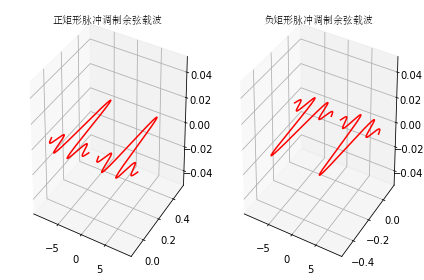

In [183]:
# 连载86 三维频谱：包含幅度和相位信息
f = np.arange(1,9.01,0.01)
x = 0.5*np.sinc(f-5)
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(f,x,0*x,label='positive side',color='r')
f = np.arange(-9.01,-1,0.01)
x = 0.5*np.sinc(f+5)
ax.plot(f,x,0*x,label='negative side',color='r')
# ax.legend()
ax.set_title('正矩形脉冲调制余弦载波', fontproperties='stsong')

# fig = plt.figure()
ax2 = fig.add_subplot(1,2,2,projection='3d')
f2 = np.arange(-9.01,-1,0.01)
x2 = -0.5*np.sinc(f2+5)
ax2.plot(f2,x2,0*x2,label='positive side',color='r')
f2 = np.arange(1,9.01,0.01)
x2 = -0.5*np.sinc(f2-5)
ax2.plot(f2,x2,0*x2,label='negative side',color='r')
# ax2.set_title('$\\tau$=1 negative Square wave to modulate the cosine wave spectrum')
ax2.set_title('负矩形脉冲调制余弦载波', fontproperties='stsong')


plt.tight_layout()
# ax3 = fig.add_subplot(1,3,3)
# plt.show()

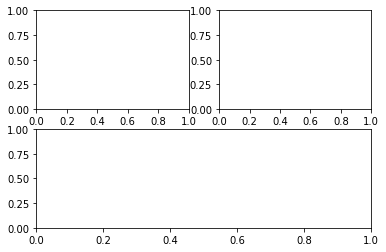

In [287]:
ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)

Text(0.5, 1.0, '正负矩形脉冲调制余弦载波的频谱幅度相同')

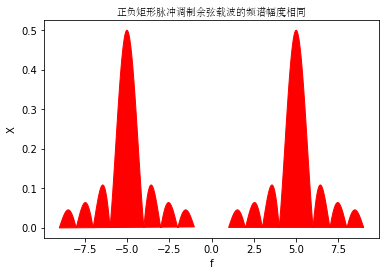

In [187]:
f = np.arange(-9,-1.01,0.01)
X = abs(0.5*np.sinc(f+5))
plt.fill(f,X,color='r')
f = np.arange(1.01,9,0.01)
X = abs(0.5*np.sinc(f-5))
plt.fill(f,X,color='r')
plt.xlabel('f')
plt.ylabel('X')
plt.title('正负矩形脉冲调制余弦载波的频谱幅度相同', fontproperties='stsong')

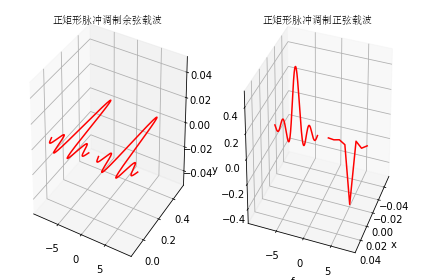

In [208]:
# 连载88
f = np.arange(1,9.01,0.01)
x = 0.5*np.sinc(f-5)
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(f,x,0*x,label='positive side',color='r')
f = np.arange(-9.01,-1,0.01)
x = 0.5*np.sinc(f+5)
ax.plot(f,x,0*x,label='negative side',color='r')
# ax.legend()
ax.set_title('正矩形脉冲调制余弦载波', fontproperties='stsong')

ax2 = fig.add_subplot(1,2,2,projection='3d')
f2 = np.arange(-9.01,-1,0.01)
y = 0.5*np.sinc(f2+5)
ax2.plot(0*f2,f2,y,label='positive side',color='r')
f2 = np.arange(1.01,9,01.01)
y = -0.5*np.sinc(f2-5)
ax2.plot(0*f2,f2,y,label='negative side',color='r')
# ax.legend()
ax2.set_title('正矩形脉冲调制正弦载波', fontproperties='stsong')
ax2.set_xlabel('x')
ax2.set_ylabel('f')
ax2.set_zlabel('y')
ax2.view_init(30,20)

plt.tight_layout()
plt.show()

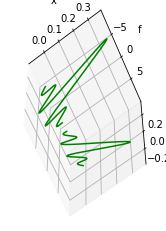

In [246]:
# 连载89 QPSK调制，输入10，映射IQ=(+1/sqrt(2),-1/sqrt(2)), 输出$s(t)=I*cos(2\pi ft) - Q*sin(2\pi ft)$
a = 1/np.sqrt(2)
f = np.arange(-9,-1.01,0.01) 
x = 0.5*a*np.sinc(f+5)
y = 0.5*a*np.sinc(f+5)
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(x,f,y,color='g')


f = np.arange(1.01,9,0.01) 
x = 0.5*a*np.sinc(f-5)
y = -0.5*a*np.sinc(f-5)
# ax2 = fig.add_subplot(1,2,2,projection='3d')
ax.plot(x,f,y,color='g')
ax.set_ylabel('f')
ax.set_xlabel('x')
ax.set_zlabel('y')
ax.view_init(-60,-60)
# ax.set_title('3D Spectrum of QPSK for input 10')

# plt.tight_layout()
plt.show()

QPSK: $s(t)=I*cos(2\pi ft) - Q*sin(2\pi ft)$

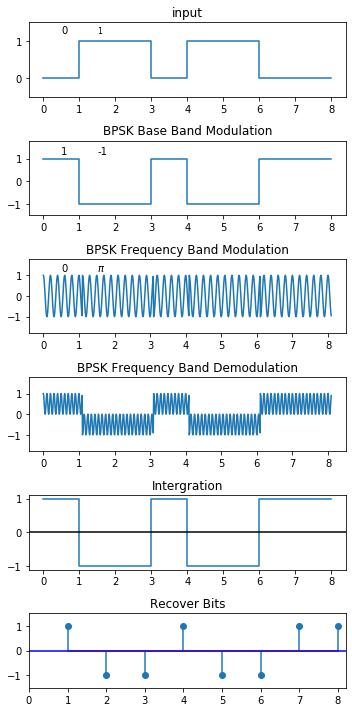

In [305]:
# 连载91 BPSK解调频域分析
# 时域采用cosine wave调制，便采用cosine wave解调，频域处理直观来看将频谱搬回原点便可采用低通滤波解调，时域处理直观来看在一个码元周期积分便可
# BPSK调制频谱
imgnum = 6
plt.figure(figsize=(5,10))
# input signal
plt.subplot(imgnum,1,1)
t = np.arange(0,9,1)
d = [0,1,1,0,1,1,0,0,0]
plt.plot(t,d,drawstyle='steps-post')
plt.ylim([-0.5,1.5])
plt.annotate('0',xy=(0.5,1.2))
plt.text(1.5,1.2,'1',fontdict={'size':'8'})
# plt.annotate(['1','0'],xy=[(2.5,1.2),(3.5,1.2)]) #无法同时进行标注
plt.title('input')

# 基带调制信号(映射+基带调制)
plt.subplot(imgnum,1,2)
t = np.arange(0,9,1)
d = [1,-1,-1,1,-1,-1,1,1,1]
plt.plot(t,d,drawstyle='steps-post')
plt.ylim([-1.5,1.8])
plt.annotate('1',xy=(0.5,1.2))
plt.annotate('-1',xy=(1.5,1.2))
plt.title('BPSK Base Band Modulation')

# 频带调制信号(5Hz Cosine Wave)
plt.subplot(imgnum,1,3)
t = np.arange(0,8.1,0.01)
y = [np.cos(2*np.pi*5*t) for t in t if t<1.1]
y.extend([np.cos(2*np.pi*5*t+np.pi) for t in t if 1.1<=t<3.1])
y.extend([np.cos(2*np.pi*5*t) for t in t if 3.1<=t<4.1])
y.extend([np.cos(2*np.pi*5*t+np.pi) for t in t if 4.1<=t<6.1])
y.extend([np.cos(2*np.pi*5*t) for t in t if 6.1<=t<8.1])
plt.plot(t,y)
plt.ylim([-1.8,1.8])
plt.annotate('0',xy=(0.5,1.2))
plt.annotate('$\pi$',xy=(1.5,1.2))
plt.title('BPSK Frequency Band Modulation')

# 频带解调信号，乘上cos(2*np.pi*5*t)
plt.subplot(imgnum,1,4)
t = np.arange(0,8.1,0.01)
# y = [np.cos(2*np.pi*5*t)*np.cos(2*np.pi*5*t) for t in t if t<1.1]
# y.extend([np.cos(2*np.pi*5*t+np.pi)*np.cos(2*np.pi*5*t) for t in t if 1.1<=t<3.1])
# y.extend([np.cos(2*np.pi*5*t)*np.cos(2*np.pi*5*t) for t in t if 3.1<=t<4.1])
# y.extend([np.cos(2*np.pi*5*t+np.pi)*np.cos(2*np.pi*5*t) for t in t if 4.1<=t<6.1])
# y.extend([np.cos(2*np.pi*5*t)*np.cos(2*np.pi*5*t) for t in t if 6.1<=t<8.1])
y = y*np.cos(2*np.pi*5*t)
plt.plot(t,y)
plt.ylim([-1.8,1.8])
plt.title('BPSK Frequency Band Demodulation')

# 积分
plt.subplot(imgnum,1,5)
y = [1,-1,-1,1,-1,-1,1,1,1]
plt.plot(y,drawstyle='steps-post')
plt.axhline(color='black')
plt.title('Intergration')

# 会付出输入信号
plt.subplot(imgnum,1,6)
x = np.arange(1,9,1)
y = [1,-1,-1,1,-1,-1,1,1]
plt.stem(x,y,use_line_collection=True)
plt.xlim(0,8.2)
plt.ylim(-1.5,1.5)
plt.axhline(color='b')
plt.title('Recover Bits')

plt.tight_layout()

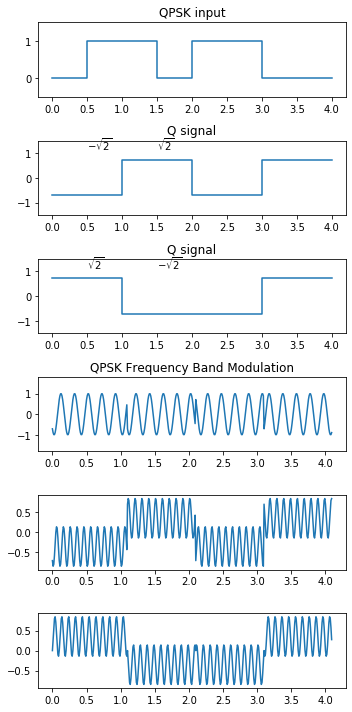

In [327]:
# 连载94： QPSK 调制解调
imgnum = 6
a = 1/np.sqrt(2)
plt.figure(figsize=(5,10))
# input signal
plt.subplot(imgnum,1,1)
# t = np.arange(0,8.5,0.5)
# d = [0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0]
t = np.arange(0,4.5,0.5)
d = [0,1,1,0,1,1,0,0,0]
plt.plot(t,d,drawstyle='steps-post')
plt.ylim([-0.5,1.5])
# plt.annotate('0',xy=(0.5,1.2))
# plt.text(1.5,1.2,'1',fontdict={'size':'8'})
plt.title('QPSK input')

# I signal
plt.subplot(imgnum,1,2)
x = np.arange(0,5,1)
d = [-a,a,-a,a,a]
plt.plot(x,d,drawstyle='steps-post')
plt.ylim([-1.5,1.5])
plt.annotate('$-\\sqrt{2}$',xy=(0.5,1))
plt.annotate('$\\sqrt{2}$',xy=(1.5,1))
plt.title('Q signal')

# Q signal
plt.subplot(imgnum,1,3)
x = np.arange(0,5,1)
d = [a,-a,-a,a,a]
plt.plot(x,d,drawstyle='steps-post')
plt.ylim([-1.5,1.5])
plt.annotate('$\\sqrt{2}$',xy=(0.5,1))
plt.annotate('$-\\sqrt{2}$',xy=(1.5,1))
plt.title('Q signal')

# 频带调制信号
plt.subplot(imgnum,1,4)
t = np.arange(0,4.1,0.01)
y = [np.cos(2*np.pi*5*t+3/4*np.pi) for t in t if t<1.1]
y.extend([np.cos(2*np.pi*5*t+7/4*np.pi) for t in t if 1.1<=t<2.1])
y.extend([np.cos(2*np.pi*5*t+5/4*np.pi) for t in t if 2.1<=t<3.1])
y.extend([np.cos(2*np.pi*5*t+1/4*np.pi) for t in t if 3.1<=t<4.1])
# t = np.arange(0,8.2,0.1)
# y = y*2
# y.extend([np.cos(2*np.pi*5*t) for t in t if 6.1<=t<8.1])
plt.plot(t,y)
plt.ylim([-1.8,1.8])
# plt.annotate('0',xy=(0.5,1.2))
# plt.annotate('$\pi$',xy=(1.5,1.2))
plt.title('QPSK Frequency Band Modulation')

# I Signal
plt.subplot(imgnum,1,5)
yI = y*np.cos(2*np.pi*5*t)
plt.plot(t,yI)

# Q Signal
plt.subplot(imgnum,1,6)
yQ = y*-np.sin(2*np.pi*5*t)
plt.plot(t,yQ)

plt.tight_layout()

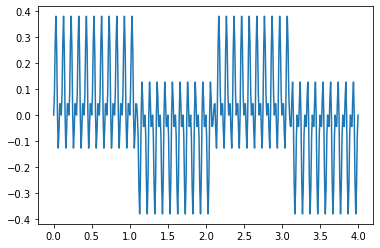

In [315]:
y = y*-np.sin(2*np.pi*5*t)
plt.plot(t,y)

In [319]:
y = [np.cos(2*np.pi*5*t+3/4*np.pi) for t in t if t<1.1]
len(y)
y = y*2
len(y)

220